# Kapitel 2 Övningar

## Faktafrågor

### 1. 

Man arbetar iterativt och behöver då gå fram och tillbaka i denna listan under hela projektet. 

Första steget defienera vad målet med projektet är vad det vara användbart för och hur ska vi mäta våra framgångar.

Andra steget är att få tillgång till datan ta reda på vilken data samt hantera datan på ett legligt/juridiskt korekt sätt. Och sedan dela upp datan i 3 delat Träning, validering och test.

Tredje steget är att man ska utforska datan genom en EDA (exploratory data analysis).  
Leta efter mönser och samband samt få en större förståelse över datan. Titta efter fel.

Fjärde steget bearbeta datan, alltså rensa outliers, städa upp datan, ta bort varibaler som är öndiga för det mål vi söker.

femte steget ml-modellering är när man skapar/provar olika modeller för att få fram så bra resultat som möjligt. Detta gör man genom att använda tränings, validerns och testdatan genom att köra olika modeller och korregar modellernas hyperparametrar tills att man är nöjd med resultatet.

sjätte steget är när man ska presentera sin lösning för intressenter, vilket budskap ska man framföra visualering av projektet så att det är lättare att förstå visa det som du tror att intressenterna vill se beroende på vem det är.

sjunge steget, produktionsomsättning avb modellen, I detta steg så ska man kunna bibehålla denna modell genom att exempelvis enehetstesta och säkerställa att funktionaliteten fungerar som den ska samt att den inte vlir sämre över tid beroende på olika faktorer som ekonomi bettende eller innovation.


### 2.

När en model produktionssätts så betyder det att modellen är tillgänglig för allmäneten att användas, exmepelvis som chatgpt.

### 3.

Scikit-learn är ett maskininlärningsbibliotek som har bland annat olika algoritemer för regression, klassificiering, klisting, modellval och databearbetning.

Estimator är det som lär/tränar sig ifrån data genom att använda .fit() metoden.

Predictors är en sorts estimator som gör prediktioner genom .predict() metoden. Man får då ut en svore som visar hur bra prediktioner som görs genom att jämnföra prediktionerna med data.

Transformers är också en sorts estimator som tranformerar data genom .tranform() metoden. Man transformerar datan för att det ska bli lättare för modellen att se mönster/samband/läsa datan.

### 4.

TensorFlow och Keras är två andra maskininlärningsbibliotek precis som ScikitLearn. Man brukar tänka att Keras är som ratten och Tensorflow som motorn i en bil.

## Resonemanfrågor

### 5.

Stina har rätt så man inte ska göra modellen för anpassad till testdatan då generealiseringförmogan kan bli sämre i slutändan

### 6.

Det är så många apsekter och saker som behöver gå rätt för att ett AI/ML projekt ska gå perfekt, att man därför har svårt att predektera slut resultat då man kan ha tillexmepel brist på data/kompetens eller bara dåliga modeller. Så därför bör man ta det som det kommer och göra det bästa utav det resultat man får utav projektet även ifall det inte är det som man tänkt sig från början.

## Koduppgifté*E'e'er

### 7.

Det gjorde vi i måndags.

### 8.

Koden nedan skapar ett dataset på 20000rader och 3 features/kolumner, tränar data igenom LinearRegression och sparar samt laddar modellen med dump och load.

Man sparar modellen för att slippa träna om den senare, vilket kan spara mycket tid, särskilt om träningen tar lång tid.

In [1]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from joblib import dump, load
X, y = make_regression(n_samples=20000, n_features=3,
noise=0.1)

df_regression = X, y
model = LinearRegression().fit(X, y)
dump(model, "linear_model.joblib")
model_loaded = load("linear_model.joblib")
print(model_loaded.predict(X[:5]))


[ 38.87480578 132.73434914 105.10940757 322.58983284 -74.40611269]


### 9. 

### a.

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression

data = pd.read_csv("data_01.csv")
print(data)

           x1        x2        x3        x4        x5      target
0    0.743487  1.072825  1.332911 -1.244771  0.344978  220.173943
1    0.835264  0.202184  0.966480  0.745883 -0.033773  175.873929
2   -1.103234  0.030615 -0.140385  0.727683 -2.831224 -162.270054
3    1.210186  1.685258 -0.394123  0.719024 -2.166585  165.930461
4    0.474577  0.647737 -0.451812 -0.409472 -0.051473   43.250511
..        ...       ...       ...       ...       ...         ...
194  0.506013 -1.546832  1.371920  0.365069  1.217062   48.732442
195 -0.108058  0.008594 -0.244017  0.624930  0.397292   -0.346974
196 -0.331685  0.763282 -0.046545 -2.077271 -0.441957  -30.311940
197  3.106505  1.060556 -0.709179 -1.876106  0.161476  237.660709
198 -0.628655 -0.142817 -2.219201 -2.189732  0.720388 -260.843988

[199 rows x 6 columns]


### b.

In [3]:
X = data.drop(columns=["target"])
y = data["target"]

### c.

In [4]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.15, random_state=42)

### d.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

lin_reg = LinearRegression()
dectree_reg = DecisionTreeRegressor()

lin_reg.fit(X_train, y_train)
dectree_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_val)
y_pred_dectree = dectree_reg.predict(X_val)

### e.

In [6]:
from sklearn.metrics import mean_squared_error

y_pred_lin = lin_reg.predict(X_test)
y_pred_dectree = dectree_reg.predict(X_test)

print("LinearRegression MSE: ", mean_squared_error(y_test, y_pred_lin))
print("DecisionTree MSE: ", mean_squared_error(y_test, y_pred_dectree))

LinearRegression MSE:  11.75033385529217
DecisionTree MSE:  8861.535959871186


### f.

In [7]:
X_full_train = pd.concat([X_train, X_val])
y_full_train = pd.concat([y_train, y_val])

lin_reg.fit(X_full_train, y_full_train)

LinearRegression()

### g.

In [8]:
y_pred_linreg = lin_reg.predict(X_test)

print("LinReg MSE: ", mean_squared_error(y_test, y_pred_linreg))

LinReg MSE:  11.367343182095903


### h.


In [9]:
X_full_train = pd.concat([X_full_train, X_test])
y_full_train = pd.concat([y_full_train, y_test])

best_model = lin_reg
best_model.fit(X_full_train, y_full_train)


LinearRegression()

## 10.

### a.

In [10]:
import pandas as pd

salary_data = pd.read_csv("salary_dataset.csv")

In [11]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [12]:
salary_data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [13]:
x = salary_data["YearsExperience"]
y = salary_data["Salary"]

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

x_array = np.array(x).reshape(-1, 1)
y_array = np.array(y)

lin_reg = LinearRegression()
dectree_reg = DecisionTreeRegressor()

cv_results_lin = cross_validate(lin_reg, x_array, y_array, cv=5, scoring="neg_root_mean_squared_error")
cv_results_dectree = cross_validate(dectree_reg, x_array, y_array, cv=30, scoring="neg_root_mean_squared_error")

print("Linear Regression RMSE:", -cv_results_lin['test_score'])
print("Decision Tree Regression RMSE:", -cv_results_dectree['test_score'])

print("Mean RMSE (Linear):", -np.mean(cv_results_lin['test_score']))
print("Mean RMSE (Decision Tree):", -np.mean(cv_results_dectree['test_score']))


Linear Regression RMSE: [5089.70910462 5565.4891967  7731.79553004 8271.45925566 5980.52992967]
Decision Tree Regression RMSE: [ 6862.   6862.   8474.   3634.   3634.   3508.   3508.  10000.  10000.
  6029.   6842.5  1163.   1163.    705.5  4030.   1909.   1909.  17059.
 12577.  12577.   6535.   6535.  12510.  12510.   3849.   3849.   4334.
  4334.    519.    519. ]
Mean RMSE (Linear): 6527.796603338702
Mean RMSE (Decision Tree): 5931.333333333333


## 11.

In [16]:
import seaborn as sns

df=sns.load_dataset("mpg")
print(df.head)

<bound method NDFrame.head of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  

In [17]:
df = df.dropna()

In [18]:
print(df.head)

<bound method NDFrame.head of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  

In [19]:
df = df.drop(columns=["name"])

In [20]:
df = pd.get_dummies(df, columns=["origin"], drop_first=True)

In [21]:
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year  origin_japan  origin_usa  
0          70         False        True  
1          70         False        True  
2          70         False        True  
3          70         False        True  
4          70         False        True  


In [22]:
X = df.drop(columns=["mpg"])
y = df["mpg"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [24]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred_lin_reg = lin_reg.predict(X_test)

print("LinearRegression MSE: ", mean_squared_error(y_test, y_pred_lin_reg))

LinearRegression MSE:  11.882268558597127


In [25]:
rmse = mean_squared_error(y_test, y_pred_lin_reg, squared=False)
print("Linear Regression RMSE:", rmse)

Linear Regression RMSE: 3.447066660016474


C:\Users\kaspe\anaconda3\new_anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


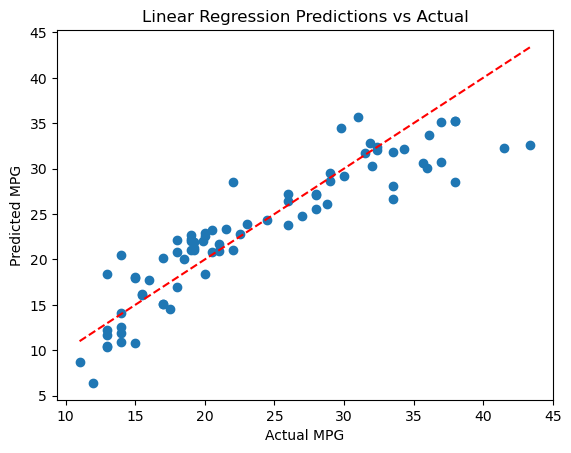

In [26]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_lin_reg)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Linear Regression Predictions vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()